In [81]:
!cat iologs/* > benchmarks.csv
#!for w in 8m 4m 2m 1m 512k 256k 128k 64k 32k 28k 16k 4k; do for s in 16m 8m 4m 2m 1m 512k 256k 128k 64k; do rm binfile; python io.py $w $s; done ; done

In [82]:
import pandas as pd
import seaborn as sns 
import numpy as np

df = pd.read_csv('benchmarks.csv')
df.columns 

Index(['Write', 'Seek', 'Time'], dtype='object')

In [84]:
idx= sorted(df['Seek'].unique())
cols =  sorted(df['Write'].unique())
data = np.random.randn(len(idx), len(cols)) * np.nan

for is_, s in enumerate(idx):
    for iw, w in enumerate(cols):
        ddf = df.loc[df['Seek'] == s][df['Write'] == w]
        v = ddf['Time'].values
        if len(v) == 0: continue
        data[is_, iw] = v[0]
mydf = pd.DataFrame(data, index=idx, columns=cols)


/var/folders/mx/qjhp3qsj77zfb1x4vj6d6xtr0000gn/T/ipykernel_41045/3603781089.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ddf = df.loc[df['Seek'] == s][df['Write'] == w]


<AxesSubplot:>

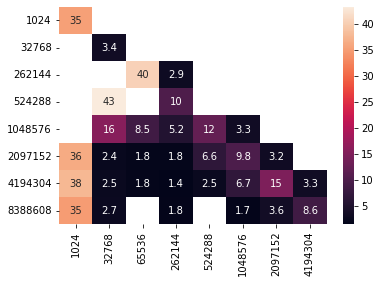

In [87]:
sns.heatmap(mydf, annot=True) 

In [85]:
df = df.set_index(['Seek', 'Write'])
# df = df.set_index(['Write', 'Seek'])

In [86]:
idx= ['aaa','bbb','ccc','ddd','eee']
cols = list('ABCD')
df = pd.DataFrame(abs(np.random.randn(5,4)), index=idx, columns=cols)
